<a href="https://colab.research.google.com/github/Vishalsharma09/PlayStore-App-Review-Analysis/blob/main/Copy_of_Sample_EDA_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **AirBnb Bookings Analysis**



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### Name  -   Vishal Sharma

# **Project Summary -**

# **AirbedandBreakfast : Airbnb**
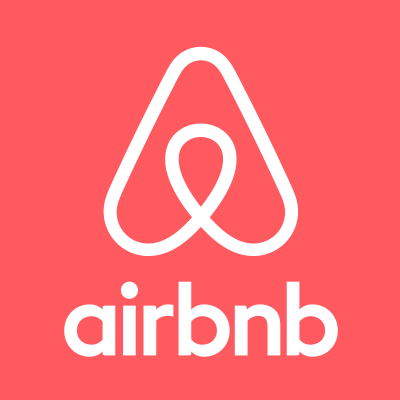




**Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.**

**This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.** 


Write the summary here within 500-600 words.

# **GitHub Link -** https://github.com/Vishalsharma09

Provide your GitHub Link here.

# **Problem Statement**


# **Problem Statement** 


*   What can we learn about different hosts and areas?
*   Which hosts are the busiest and why?
*   Is there any noticeable difference of traffic among different areas and what could be the reason for it?





#### **Define Your Business Objective?**

The mission is to Create a world where anyone can belong anywhere.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd 
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

import statistics
from collections import Counter 

#NLP 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#word  could
from wordcloud import WordCloud, ImageColorGenerator
sns.set_theme(style="ticks", color_codes=True)

### Dataset Loading

In [ ]:
# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Airbnb Booking Analysis/Airbnb NYC 2019.csv")
data.shape

## **Dataset First View**

In [ ]:
# Dataset First Look
data.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(data.columns)
rows=data.shape[0]
columns=data.shape[1]
print(f"The number of rows is {rows} and number of columns is {columns}")

**Observations**:


*   There are total 16 columns.
*   The total number of rows are 48895.




### Dataset Information

In [ ]:
# Dataset Info
data.info()

In [ ]:
data.isnull().sum()

**Observations:**



*   There are total four columns with null values.
*   name column is having total 16 null values.
*   host_name is having 21 null values.
*   last_review and reviews_per_mpnth are having more null values.
*   We will look at the columns and decide what we can do with them.







#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
Total = data.isnull().sum().sort_values(ascending = False) #total per column
missing_values = round(((data.isnull().sum())*100)/data.isnull().count().sort_values(ascending=False),2)
#missing_value data frame.
missing_total_percentage = pd.concat([Total,missing_values],axis=1,keys = ['Total','Percentage'],sort=False).sort_values('Total',ascending=False)
missing_total_percentage

In [ ]:
# Visualizing the missing values
import missingno as msno 
msno.bar(data)

### What did you know about your dataset?

# From data analysis point of view host_name will not be that important as its an catagorical feature and will have lots of catagories and this will not contribute in exploring the data and also from security point of view of host.
# Columns 'last_review' & 'reviews_per_month' are having lots of mission values with 20% of whole data we will replace with 0 for NA values in 'reviews_per_month' column.
# We will convert its data type to catagorical feature and replace 'NA' with 'never'.
# reviews_per_month 'NA' value handling 

In [ ]:
data['last_review']

In [ ]:
# to deal with NA in 'last_review', we change the column to a categorical variable (by year), 
#and those that have NA will be categorised as 'Never', as they did not get any reviews yet
# convert the date field
data['last_review'].fillna(value = 0, inplace = True)
'''
data['last_review'] = pd.to_datetime(data['last_review"], format = '%Y-%m-%d')
data.last_review = data['last_review'].dt.year.astype('object')
data.last_review.fillna(value = Never, inplace = True)
'''

In [ ]:
data['last_review']

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(data.columns)
columns=data.shape[1]
print(f"The number of columns is {columns}.")
     

In [ ]:
# Dataset Describe
data.describe()

### Variables Description 

Observations:


1.   Min of Price variable is 0, max is 10000.
2.   Mean price is 152. 
3.   On an average people stay 7 days in a room.







### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
data.nunique(axis=0)
     

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
def datainfo():
  temp=pd.DataFrame(index=data.columns)
  temp["datatype"]=data.dtypes
  temp["not null values"]=data.count()
  temp["null values"]=data.isnull().sum()
  temp["% of the null values"]=data.isnull().mean()
  temp["unique count"]=data.nunique()
  return temp 
datainfo()

### What all manipulations have you done and insights you found?

rom the above, we found the datatypes of each rows. And also we found the not null values, null values, % of the null values and unique counts.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# **Univariate Analysis:**

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

# **1. column_no_1:name**

In [ ]:
#name column
data.name

In [ ]:
data[data['name'].isnull()].head()

Observation:



1.   This columns is having names describing the property which is host is trying to give on rent,so the nature of this names is short and consise and this is required as this can draw an attention of customer.
2.   The question arises that how to fill the missing values in this columns.we will explore further dataset and try to find out better options to fill the missing values.
3.   This Feature can be important in model building like Recommender systems.
4.   Of course there is no point in removing these cells although they are limited in numbers.



In [ ]:
data.room_type

**Observation:**



1.   room_type column is not having any null values,and also we can try to use this values in place of NAN values in name column this can solve our purpose and we can atleast put front what is the type of room!
2.   yes, we will replace the nan values with the values which are in room_type column.




In [ ]:
# This code snippit will replace the nan values.
#fillna() method will do the job . . .
data.name.fillna(data.room_type, inplace=True)

In [ ]:
#check the changes.
data.isnull().sum()
     

**Observation**:



1.   We have replaced the nan values with corresponding room_type values.
2.   This should solve our purpose.



In [ ]:
#stop words removal:
"""
1) download the nltk stopwords in english.
2) replace pantuation and special symbols.
3) make it string and convert all into lower case.
then split the words and compair each with the stopwords and keep only those which are not in stopword list.
"""
def stop_word_removal(df):
  stop = stopwords.words('english')
  df.name = df.name.str.replace("[^\w\s]", "").str.lower()
  df.name = df.name.apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))
     

In [ ]:
text = stop_word_removal(data)
text = " ".join(str(each) for each in data.name )

In [ ]:
#wordcloud generator.
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=300, background_color="black").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()
pass


**Observations**:


1.   This word cloud shows us the most frequent words.




In [ ]:
#after removing stop words.
data.name

# **Top 50 words from word_cloud:**

In [ ]:
#list of words.
name_list = list(data.name.values)
words = [ ]
for i in name_list:
  words+=i.split()

In [ ]:
#let's see top 50 used words .
#https://www.kite.com/python/docs/collections.Counter.most_common
_top_50_words=Counter(words).most_common()
_top_50_words=_top_50_words[0:50]
     

In [ ]:
#dataframe for top 50 words.
top_50_words = pd.DataFrame(_top_50_words,columns = ['words','frequency'])
     


In [ ]:
# visualization
plt.figure(figsize=(20,5))
ax_1 = sns.barplot(x='words',y='frequency',data = top_50_words)
ax_1.set_title('top 50 words')
ax_1.set_ylabel('frequency of words')
ax_1.set_xlabel('Words')
ax_1.set_xticklabels(ax_1.get_xticklabels(), rotation=60)

**Observations**:



1.   The above observation shows us the top 50 words and there frequency.
2.   These words can he help full in model buliding point of view.



# **2. column_no_2 host_name:**

In [ ]:
data['host_name'].nunique()

**Observations**:



1.   host_name this column is defining the name of host(owner).

2.  There are 11452 unique hosts/owners we can use this featue directly in model building just by encoding it.response encoding will be usefull for this feature. 
3.   we can take nan value as one data point for model building.



#### Chart - 2

In [ ]:
# Chart - 2 visualization code

# **2. column_no_3 neighbourhood_group:**

In [ ]:
data['neighbourhood_group']

In [ ]:
data['neighbourhood_group'].unique()

In [ ]:
#count_plot
plt.figure(figsize=(10,5))
ax_3 = sns.countplot(x='neighbourhood_group',data = data)
ax_3.set_title('Count of neighbourhood_group')
ax_3.set_ylabel('frequency')
ax_3.set_xlabel('neighbourhood_group')
plt.show()

**Observation**:



1. Brooklyn and Manhattan have the highest hotel/room bookings.  



#### Chart - 3

In [ ]:
# Chart - 3 visualization code

# **4. column_no_4 neighbourhood:**

In [ ]:
neigh_unique_values = data['neighbourhood'].value_counts()
neigh_unique_values

**Observations**:

1.  There are 221 unique neighbour. 



**`Top 50 most common neighbours`**








In [ ]:
# most_common() Return a list of the n most common elements and their counts from the most common to the least.
top_50_=Counter(data['neighbourhood']).most_common()
top_50_=top_50_[0:50]
top_50_[:20]

In [ ]:
#count_plot
plt.figure(figsize=(20,5))
ax_4 = sns.barplot(x='neighbourhood',y='count', data = pd.DataFrame(top_50_,columns=['neighbourhood','count'][:20]))
ax_4.set_title('Count of Neighbourhood')
ax_4.set_ylabel('Frequency')
ax_4.set_xlabel('Neighbourhood')
ax_4.set_xticklabels(ax_4.get_xticklabels(), rotation=80);
plt.show()
     

**Observations**:


1.  The above plot shows us some of the top Neighbours towns we can say.
2.  People like to stay at these towns more offent
 



#### Chart - 4

In [ ]:
# Chart - 4 visualization code

# **5. column_no_5 latitude & longitude:**

In [ ]:
data[['latitude','longitude']]

**Observation**:


1. We can see the exact locations from this columns.
  



In [ ]:
# simple scatterplot

plt.figure(figsize=(10,6))
ax_5 = sns.scatterplot(data.longitude,data.latitude,hue=data.neighbourhood_group)
ax_5.set_title('Density of rooms')
ax_5.set_ylabel('latitude')
ax_5.set_xlabel('longitude')
plt.show()

**Observations**:



1. latitude and longtitude visulalizes us that Brooklyn and Manhattan are the most dense with hotels and apartments followed by queens island.  



#### Chart - 5

In [ ]:
# Chart - 5 visualization code

# **6. Column_no_6 room_type:**

In [ ]:
data[['room_type']].nunique()

In [ ]:
# count_plot'
plt.figure(figsize=(10,5))
sns_6 = sns.countplot(x='room_type',data = data)
sns_6.set_title('frequency_plot')
sns_6.set_ylabel('frequency')
sns_6.set_xlabel('room_type')
plt.show()

**Observations**:

1.   There are three types of rooms

2.   Namely:

1.Private room

2.Entire home/apt room_type

3.Shared room.


3.   People mostly prefered to take whole apartment on rent followed by Private room.

4.   very few people prefered to have shared rooms.

  We will try to catagorise the 'price'like cheap,affordable and expensive and then analyse the 'price' for 'room_type' as per it.




#### Chart - 6

In [ ]:
# Chart - 6 visualization code

# **7.column_no_7 price:**

In [ ]:
data[['price']].describe()

In [ ]:
#function to catagory the types of rooms.
def price_catagory(price):
  if price<=80:
    return 'cheap'
  elif price>=80 and price<=500:
    return 'affordable'
  else:
    return 'Expensive'
     


In [ ]:
plt.figure(figsize=(10,5))
ax_7 = sns.countplot(x=data['price'].apply(price_catagory))
ax_7.set_title('Count Plot')
ax_7.set_xlabel('Catagories of rooms')
ax_7.set_ylabel("count")
plt.show()
     

**Observations**:



1.   We have considered to devide the whole price range into three catogories
a.cheap (price range below or equal to 80$)

b.Affordable(for price range 80 to 500$)

c.Expensive(for price range more then 500$)

So, it look like people have more intrest in having "affordable" rooms/apartments rather than having cheap and expensive rooms.



#### Chart - 7

In [ ]:
# Chart - 7 visualization code

# **8. column_no_8 minimum_nights:**

In [ ]:
data[['minimum_nights']].value_counts()

In [ ]:
data[['minimum_nights']].describe()

In [ ]:
ax = sns.distplot(data.minimum_nights)
plt.title('Minimum no. of nights distribution')
plt.show()

observation

1.   most of the nights booked are from 0 to less than 100 days.
we will plot further and see.
2.   we can see that there may be outliers.we can plot and check it.
3.   we will plot, box plot and check.
4.   log scale can show us the shape of skwed data.

Note:How do you handle skewed data in Python?

One way of handling right, or left, skewed data is to carry out the logarithmic transformation on our data. For example, np.log(x) will log transform the variable x in Python. There are other options as well as the Box-Cox and Square root transformations.



**Observations From statistics:**



1.  Average booking is around 7 nights.

2.  minimum booking is for 1 night. 
3.  max booking is for more then a year or we can say for few years.
 



In [ ]:
#https://www.marsja.se/transform-skewed-data-using-square-root-log-box-cox-methods-in-python/#Log_Transformation
#https://seaborn.pydata.org/generated/seaborn.distplot.html
from scipy.stats import boxcox 
# power transform 
data_box_cox_transform = boxcox(data.minimum_nights) #lambda=0 it means log transform by defination of box-cox transform
     


In [ ]:
data_box_cox_transform
     

In [ ]:
# plot for box-cox transformed data.
sns.set_theme(); np.random.seed(0)
plt.figure(figsize=(10,5))
ax = sns.displot(data_box_cox_transform)
plt.title('Minimum no. of nights distribution')

**Observations**:


1.  it's very clear that the data is right skwed.
 



In [ ]:
log_transform = np.log(data['minimum_nights'])

In [ ]:
ax = sns.distplot(log_transform)
plt.title('Minimum no. of nights distribution')
     

**Observations**:



1.   This plots shows that majority of room booking is one for 1 to 4 days.

2.   Box-Cox transformed plot strictly shows that the majority of booking lies between 0 to 3 days.we have set the lambda parameter not equal to zero so it by defination of box-cox transform selected the best value of lambda.



#### Chart - 8

In [ ]:
# Chart - 8 visualization code

# **9. column_no_9 Number_of_reviews:**

In [ ]:
data[['number_of_reviews']].value_counts()

In [ ]:
data[['number_of_reviews']].describe()

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.distplot(x=data["number_of_reviews"])
plt.title('number_of_reviews')

Observatios:


1.   Number of reviews are highly dense form 0 to 100 reviews.
2.   we can say that most of the rooms are not rated and those which are frequently occupied only those are rated.
3.  maximun 629 times the perticular room is rated.
4.  Average rating is around 23.



#### Chart - 9

In [ ]:
# Chart - 9 visualization code

# **10. column_no_10 last_review:**

In [ ]:
data[['last_review']]
     

Observations:


1.   This is the column which signifies the last time the room was given review.
2.   secondly,there are certain rooms which are not reviewd at all, it can happen that no one had visited till now or not bothered to give review to those rooms. 
3.   Also there are nan valuse these values can either be filled with the help of domain expert or with suitable value like since no one has reviwed we will fill it up with 'zeros'.



# **column_no_9 reviews_per_month:**

In [ ]:
data[["reviews_per_month"]].describe()

**Observations**:

1.   max is 58 times the rating is given.
2.  min is 0.
3.  75% of data is for 1.5 time rating.



#### Chart - 10

In [ ]:
# Chart - 10 visualization code

# **column_no_10 calculated_host_listings_count:**

In [ ]:
Counter(data['calculated_host_listings_count']).most_common(50)
#Counter( data['neighbourhood']).most_common(

In [ ]:
print('1. There is one host who is {} time listed. '.format(data.calculated_host_listings_count.max()))
print('2. This is the corresponding host_id {} who is having highest listing. ' .format(data.host_id.value_counts().idxmax()))
print('2. This is the corresponding host_id {} who is having lowest listing. ' .format(data.host_id.value_counts().idxmin()))
     

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

# **11. column_no_11 availability_365:**

In [ ]:
data[['availability_365']].value_counts()

In [ ]:
ax = sns.scatterplot(data=data,x='availability_365',y='price')
plt.title("Scatter_availability_365")
     

**Observations:**


1.   From above plot we can see that most of the available rooms are in the price range of 0 to 2000.
2.  Very few are available for price above 2000$, this is quite obivious that there are very few peoples who prefer to have expensive rooms


# **Multivariate Analysis:**

In [ ]:

data.columns

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

# **Lets find the relation between neighbourhood_group and price:**

In [ ]:
price_df = pd.DataFrame(data['price'].apply(price_catagory))

In [ ]:
price_df.head()

In [ ]:
plt.style.use('fivethirtyeight')
price_500 = data[data.price <700]
plt.figure(figsize=(10,6))
plt.title("price for each neighbourhood_group")
sns.boxplot(y= 'price',x= 'neighbourhood_group',data=price_500)
plt.show()
     

Observations:




1.   We can see that Manhattan is the most expensive destination immediatly followed by Brooklyn.
2.  Queens, staten island and Bronx, are having price range less as compared to
other two.

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

# **Relationship between neighbourhood_group and median price.**

In [ ]:
#rouping median price with neighbourhood_group 
neigh_group_price_group = data.groupby(['neighbourhood_group']).agg({'price':'median'}).reset_index() 

     

In [ ]:
neigh_group_price_group

In [ ]:
#barplot for price variation and neighbourhood.
plt.figure(figsize=(15,5))
ax_12 = sns.barplot(x = 'neighbourhood_group',y = 'price',data = neigh_group_price_group)
ax_12.set_title(' Median_price vs Neighbourhood_group')
ax_12.set_xlabel('neighbourhood_group')
ax_12.set_ylabel("Median_price")
plt.show()

Observations:



1.   'Manhattan' is the area having highest median price,followed by Brooklyn.




chart-14

In [ ]:
# Chart - 14 visualization code

# **Lets find the relation between neighbourhood and price:**

# We will make group of all neighbourhood who are having median of price variable.

# Median have less impact of outliers as compared to mean.

In [ ]:
data[['neighbourhood']].nunique()

In [ ]:
#we will
neigh_price_group = data.groupby(['neighbourhood']).agg({'price':'median'}).reset_index()

In [ ]:
neigh_price_group

In [ ]:
#barplot for price variation and neighbourhood.
plt.figure(figsize=(15,5))
sns.barplot(x = 'neighbourhood',y = 'price',data = neigh_price_group.head(10))
plt.title("Median_price Vs neighbourhood")
plt.show()
     

Observations:



1.   The price variation considering median value tells us that 'Allerton', 'Asden Heights','Arrochar',and other are the top 10 neighbourhoods.
2.   'Battery Park city' is having high price in Top 10 neighbourhoods.




Chat-15


In [ ]:
# Chart - 15 visualization code
     

# **Relationship between price and room_type.**

In [ ]:
plt.figure(figsize = (15,5))
ax_8 = sns.barplot(y= 'price', x= 'room_type',data=data)
ax_8.set_title('Price vs Room Type')
ax_8.set_xlabel('Room Type')
ax_8.set_ylabel("Price")
plt.show()

Observations:






1.  we can see that most of the prices for all type of rooms lies within 2000$ 
2.  shared rooms prices are having very less price
3.   very few rooms are there which are in expensive cataagory.
4.   large number of rooms are available in either entire room/apartment or private rooms/apartment.



In [ ]:
data["number_of_reviews"].value_counts()
     

# **Relationship between room_type and neighbourhood_group.**

In [ ]:
plt.figure(figsize = (10,5))
ax_11 = sns.countplot(x='room_type',hue='neighbourhood_group',data=data)
ax_11.set_title(' Room Type vs neighbourhood_group')
ax_11.set_xlabel('Room Type')
ax_11.set_ylabel("neighbourhood_group")
plt.show()

# **Which neighbourhood are generating maximum,minimum,reveneus from room types.**

In [ ]:
room_type_df = data.groupby(['neighbourhood','room_type']).agg({'price':'sum'})
room_type_df.sort_values("price",ascending=False)

In [ ]:
room_type_df = pd.pivot_table(room_type_df, values='price', index=['neighbourhood'], columns=['room_type'])
     

In [ ]:
room_type_df.head()

In [ ]:
print("******* Maximun revenue in Entire home/apt...*********",'\n')
print(room_type_df.sort_values('Entire home/apt',ascending=False).head(1),'\n')

print("***********************************************************************",'\n')

print("******* minimun revenue in Entire home/apt...*********",'\n')
print(room_type_df.sort_values('Entire home/apt',ascending=True).head(1),'\n')

print("***********************************************************************",'\n')

print("******* Maximun revenue in Private room...*********",'\n')
print(room_type_df.sort_values('Private room',ascending=False).head(1),'\n')

print("***********************************************************************",'\n')

print("******* Minimun revenue in Private room...*********",'\n')
print(room_type_df.sort_values('Private room',ascending=True).head(1),'\n')



print("***********************************************************************",'\n')

print("******* Maximun revenue in Shared room...*********",'\n')
print(room_type_df.sort_values('Shared room',ascending=False).head(1),'\n')



print("***********************************************************************",'\n')

print("******* Minimum revenue in Shared room...*********",'\n')
print(room_type_df.sort_values('Shared room',ascending=True).head(1),'\n')



# **Conclusion**

**We tried to put some light by performed the Extensive EDA for Airbnb dataset as always there is no end to EDA this can be extended in n-dimenssions and lots and lots of conclusion can be drawn from EDA this is where 80% of time is been spent by a Data Scientist.**

***Hurrah! You have successfully completed your EDA Capstone Project !!!***